# Ratings of Yelp Reviews Prediction
#### Yichen Shi, Yanran Wang, Kai Wang

## Part 1: Background & Data Overview
* **Thesis Statement:**
    * **Background**  Yelp is an Internet company founded in 2004 to “help people find great local businesses” by providing a platform for users to write reviews of businesses. 

    * **Goal:**  1. find out what makes a review positive or negative based on the review and a small set of attributes; 2. propose a prediction model to predict the ratings of reviews based on the text and said attributes.

* **Dataset:**
    * In the dataset collected in recent years, stars, name, text, date, city, categories, longitude and latitude were recorded for 1,546,379 reviews, with no missing value.

## Part 2: Data Processing
    
### 2.1 Text Processing
* Text Processing
    * Remove punctuations
    * Lowercase every word
    * Extract the word stem
    * Remove stopwords
* Generate corpus from the whole train data and vectorize all texts that comprise a large sparse matrix.
* Dimension Reduction
    * Chi-square test that selects K most informative columns
* Convert following features into numpy arrays and merge into the original sparse matrix
    * The number of specific punctuations and expressions: ‘?’, ’!’, ’:)’, ’:D’, etc.
    * The number of all caps: ‘GOOD’,’NOT’,etc.
    * Text length

Apprently, texts play an important role in determining whether a review is positive or negative. To discuss the answer of our Goal 1, we plotted word clouds consists of words in texts can mostly indicate a positive or negative review: 

In [33]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

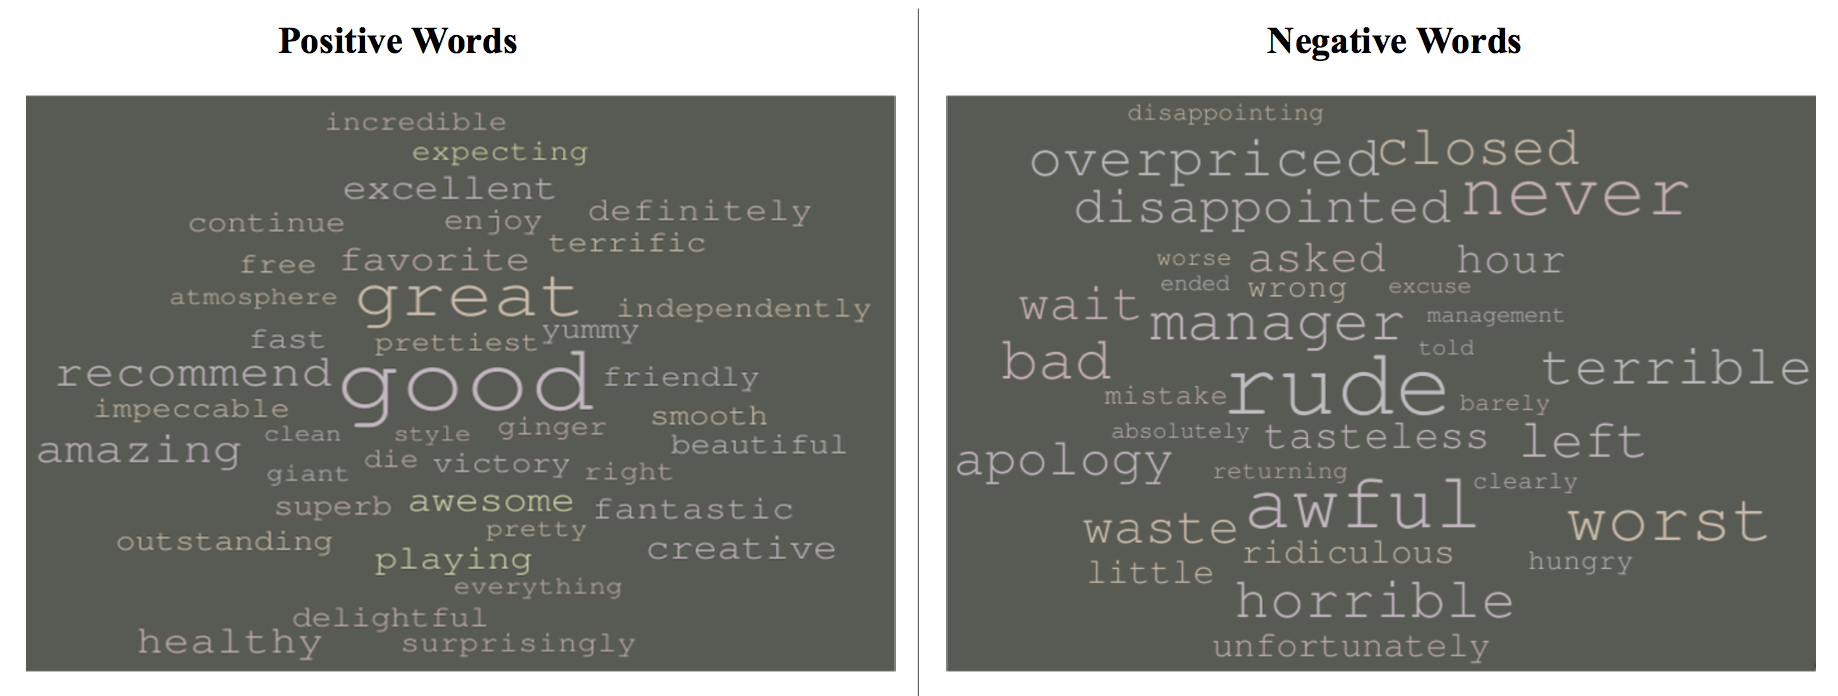

In [31]:
from IPython.display import Image
from IPython.core.display import HTML 

PATH = "../Image/"
Image(filename = PATH + "WordCloud.png", width=700)

### 2.2 Other feathers 

* Categories:
    
    Intuitively, some categories have great influence on the ratings of stars.
    
    Thus, we transform each category name from phrase into word by removing the white spaces, and special symbols, then lowercased every word. Then we use the same method we applied on texts to transfer these categories into vectors.

* Date:

    The intuitive assumption before we study time effects is whether Yelp users’ attitudes towards restaurants would change or not as social trends developed. Particularly whether people become more picky about food or not as time passed by. Thus, we transformed the data into time series. Since the data is not collected evenly during a month, we compute the average rating per month and plot it against date. 
    
    From graph **[fig.1] Time Effect**, There seems a downward trend from 2005 to 2009 and then becomes flat-tailed, but this does not mean people in the past like dine out more than nowadays. If we look at the number of earlier users in Yelp we could found the number is just small portion compared with nowadays, so the possible reason is people has less access to Internet in the past and ones who wrote reviews are more likely to give positive ratings, while for others who do not like the restaurants, they had less motivation to visit Yelp. This also suggests the data collection in the past would be more biased in response. As the number of people using Yelp increased, we notice the proportion of negative ratings increased and the average rating more balanced and getting close to the 3 stars as well. Then we scaled *year*, *month* and *day* separately for later usage.
    

* Longitude & Latitude: 

    City, longitude and latitude all stand for position information, we paied our attention on longitude and latitude, and split the data into groups equally spaced with respect to longitude and latitude.Then we could compute the average rating of each group horizontally, from east to west, and vertically, from north to south. In this case, since we assume large cities and small cities equally lies in each area, the related effect would be balanced.

    From the result **[fig. 2] Geographical Effect**, there seems a positive relationship between rating and longitude, and a negative relationship with latitude. So we scaled these two features for later usage.

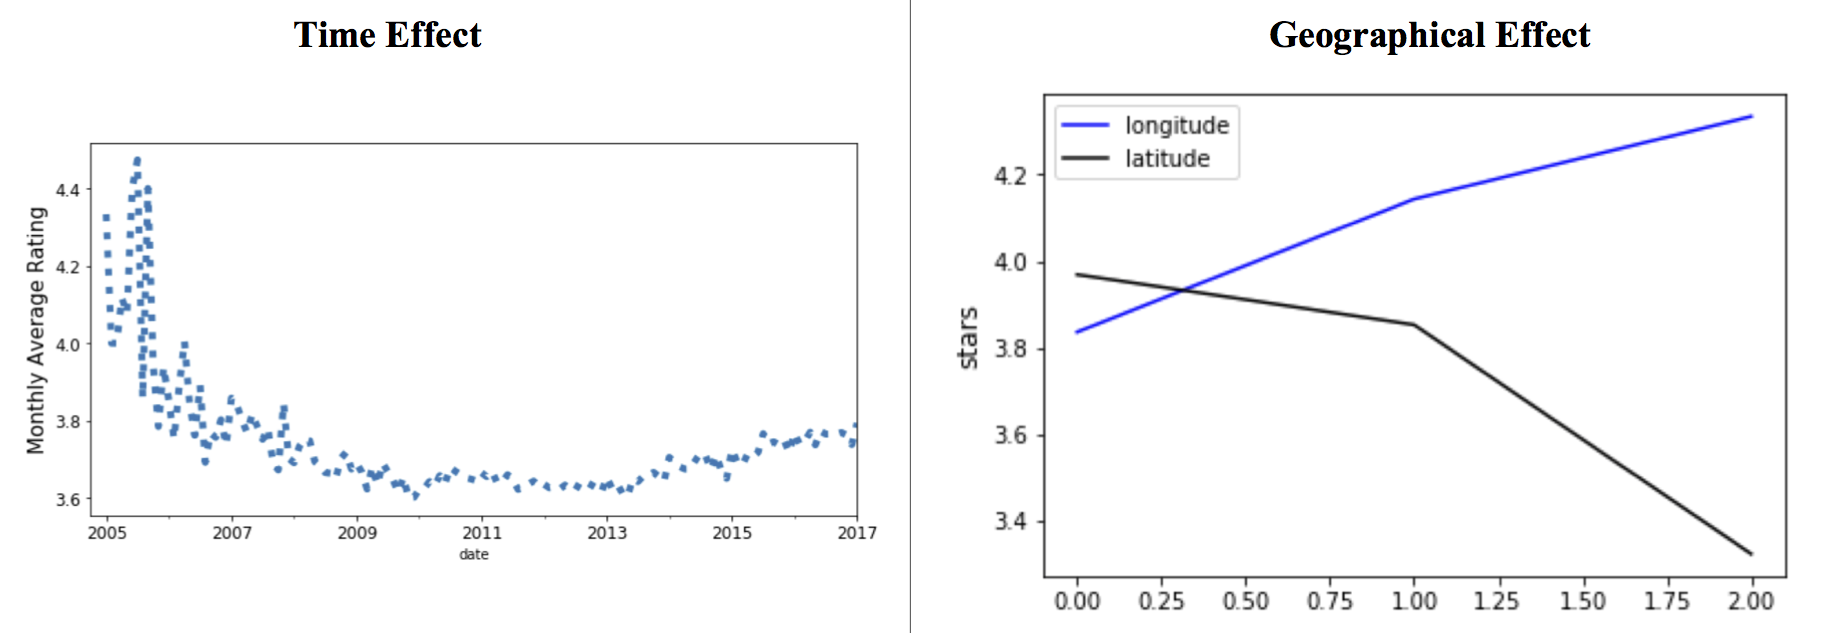

In [25]:
PATH = "../Image/"
Image(filename = PATH + "effect.png", width=700)

## Part 3: Prediction Model

We applied different models ( KNN, Lasso, Ridge, SVM, RandomForest, NeuralNetwork, LogisticRegression and NaiveBayes) to do the prediction. By comparing precision of different models on the test set, we get the table below.

INFO | KNN |Lasso | Ridge| SVM|Random Forest|Neural Network|Logistic|Naive Bayes|
------------ | -------------| ------------- |-------------  | ------| ------| -------------| -------------| -------------| -------------
Just Text| 0.95623       |0.92309   | 0.82218     |0.62696 | 0.86966    | 0.66243 | 0.76966 | 0.90876
Text and Category   | 0.94235 | 0.92242| 0.80475| 0.62682| 0.85546| 0.65644 | 0.76656| 0.90123

As can be seen in the table above, SVMs has the smallest RMSE. Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection. There are many advantages of using support vector machines. For example, it is effective in high dimensional spaces and still effective in cases where number of dimensions is greater than the number of samples.Besides, it uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.

We used sklearn in python to apply these methods. For our svm model, we choosed RBF kernel, and used cross-validation and grid-search to find our best c and g (the hyperparamter).

Also, Text+Category gives us  more accuracy on the test set than just Text and this is not surprising since some categatied do affect the reviews. For example, "Fast Food" is usually cheap and not well servised, thus it may lead to lower stars.

We also tried to combine other variables, like longitude, latitude and time altogether, but there seems no prove to the accuracy of prediction.

## Part 4: Interpretable Model
Although we have fitted several models to do the prediction and choose SVM, who has the smallest RMSE as the best model, we cannot interpret our model well. So we have come up witha fairly simple method to perform such predictions. It works to some extend, but not as good as we want it to be.  All we do is computing the average rating of all the words and categaries in all the reviews. Then we can retrieve the corresponding rating of each word in a new review and average allthe ratings. 



### 4.1 Features Processing

We first extracted year, month, day, longitude and latitude and scale them. For texts, we calculated average stars  for each words and then got average score for each review. We do the same thing on categories. Finally, we used these 7 variables to do a simple regression on stars.


### 4.2 Model Fitting
Our initial model is $$\text{Stars} = 3.741 + 1.108723*\text{TextScore}+ 0.042362*\text{CategoryScore}+ 0.001122*\text{longitude}- 0.001569*\text{latitude}+ 0.000914*\text{Year}+ 0.000569*\text{Month}+ 0.000629*\text{Day} $$
Since only TextScore and CategoryScore are significant, here is our final Interpretable Model:
$$\text{Stars} = 3.741 + 1.108723*\text{TextScore}+ 0.043080*\text{CategoryScore}$$

From the model, we can see that texts and categories are the most important effect in rating, which agreed with our pretiction model. Intuitively, we could easily recognize whether a review is positive or negative by just looking at its text. And from the qq plot below, the normality is satisfied to some extend.

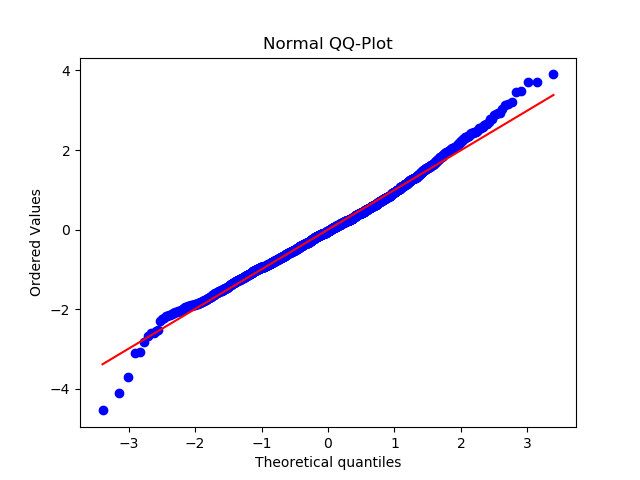

In [28]:
PATH = "../Image/"
Image(filename = PATH + "QQ.png", width=00)

## Part 4: Conclusion
### 4.1 Strengths
   * **Prediction Model:** Our prediction model has been chosen for its greatest strength, which is high accuracy and small RMSE, about 0.62 given by Kaggle.
   * **Interpretable Model:** Compared to other complex model, this model is more intuitive and easy to interpret.
   
### 4.2 Weaknesses
   * **Prediction Model:** We've tried much more advanved methods such as Neural Network, however failed to get the final results due to time and device limit. Also, there're more useful ways we could've tried to improve our text processing to get more effective clean data.
   * **Interpretable Model:** This model has poor accuracy since it is supposed to be simple.
   
### 4.3 Contribution

| Name         | Contibution                                                                     |
|--------------|---------------------------------------------------------------------------------|
| Yichen Shi   | Analyzed data and fitted two models.                                            |
| Yanran Wang  | Analyzed data, made GitHub repo, notebook, and slides for presentation.         |
| Kai Wang     | Analyzed and explored features. Processed data.                                 |